In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline



In [3]:
from sklearn import linear_model

In [4]:
microbiology_data_string = "microbiology_equal.csv"
microbiology_data = pd.read_csv(microbiology_data_string, encoding="latin1")

In [5]:
X = microbiology_data.drop('interpretationid',1)
Y = microbiology_data.interpretationid

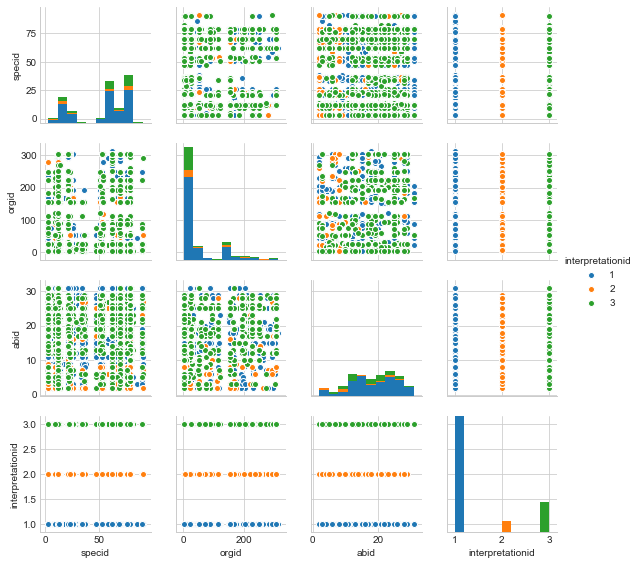

In [22]:
sns.pairplot(microbiology_data,hue='interpretationid',size=2)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [14]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state=3)

In [15]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
from sklearn import metrics

In [17]:
Y_pred = logreg.predict(X_test)

In [33]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.7386480781503117


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors = 30)

In [48]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [49]:
Y_pred = knn.predict(X_test)

In [50]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.7720779539541505


In [51]:
#find optimal K value

In [19]:
k_range = range(1,40)

accuracy = []

In [20]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Accuracy')

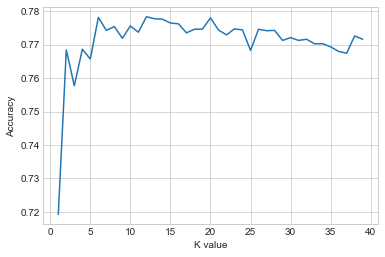

In [21]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')